## Exploratory Data Ananlysis [EDA] And Data Visualization with Haberman Dataset


In [1]:
# Importing Packages
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt



data = pd.read_csv('haberman.csv')

In [2]:
data.describe()

,age,year,nodes,status
count,305.000000,305.000000,305.000000,305.000000
mean,52.357377,62.868852,4.032787,1.262295
std,10.678010,3.242783,7.200528,0.440605
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.000000,66.000000,4.000000,2.000000
max,78.000000,69.000000,52.000000,2.000000


# Observation:

1.The dataset has age data points in which the maximum age mentioned in 83, while mininmum age is 30 (max & min age)(83 & 30 yrs).

2.The year column data indicates the range of year mentioned from 58 to 69 , i,e year(1958 to 1969).

3.The nodes column indicates data with min starting from 0 to max 52, 
We can say that 25% of them have 0 node while 50% of them have 1 node while 75% have 4 node, rest above the 75% a few on the max side have 52 node.


In [3]:
data.shape

(305, 4)

The data set has 4 features & total 306 data points

In [4]:
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
data['status'].value_counts()

1    225
2     80
Name: status, dtype: int64

The Dataset consists of 225 points labelled as "1", while 81 data points is labelled as "2", say i.e 1= "Survived", 2 ="Died"

In [6]:
age_counts = data['age'].value_counts()
print(age_counts.head(10))

52    14
54    13
50    12
43    11
47    11
53    11
57    11
38    10
49    10
41    10
Name: age, dtype: int64


In [7]:
print(age_counts.tail(5))

77    1
71    1
75    1
76    1
78    1
Name: age, dtype: int64


Highest number of people is from age 52 yrs that has count of 14, followed by 54, 50.
Lowest number of people count is 1 who is with age 83.

In [8]:
nodes_counts = data.nodes.value_counts()
print(nodes_counts.head(10))

0    136
1     41
3     20
2     19
4     13
6      7
7      7
8      7
5      6
9      6
Name: nodes, dtype: int64


In [9]:
print(nodes_counts.tail())

25    1
28    1
30    1
35    1
52    1
Name: nodes, dtype: int64


## Exploring Features:




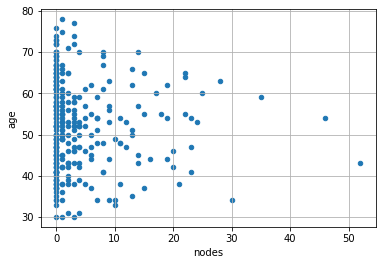

In [10]:
# Using Scatter for 2D

data.plot(kind="scatter", x="nodes", y ="age")
plt.grid()
plt.show()

Data above is shownig overlap and same color is not giving any useful insights so lets plot it using seaborn  

C:\Users\h103196\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


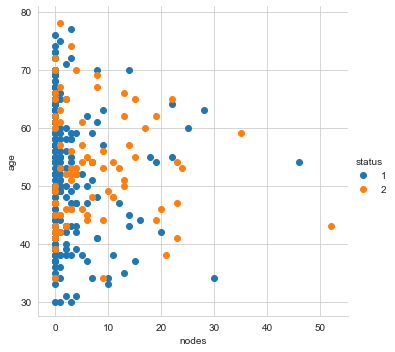

In [11]:
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", size = 5)\
    .map(plt.scatter, "nodes", "age")\
    .add_legend()
plt.show()    

* The Plot says that the once on the node '0' have more number of 1 status which we can say that those have more chances of survival.


## Pair-plot 
to visulaize on all the features in the dataset

C:\Users\h103196\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


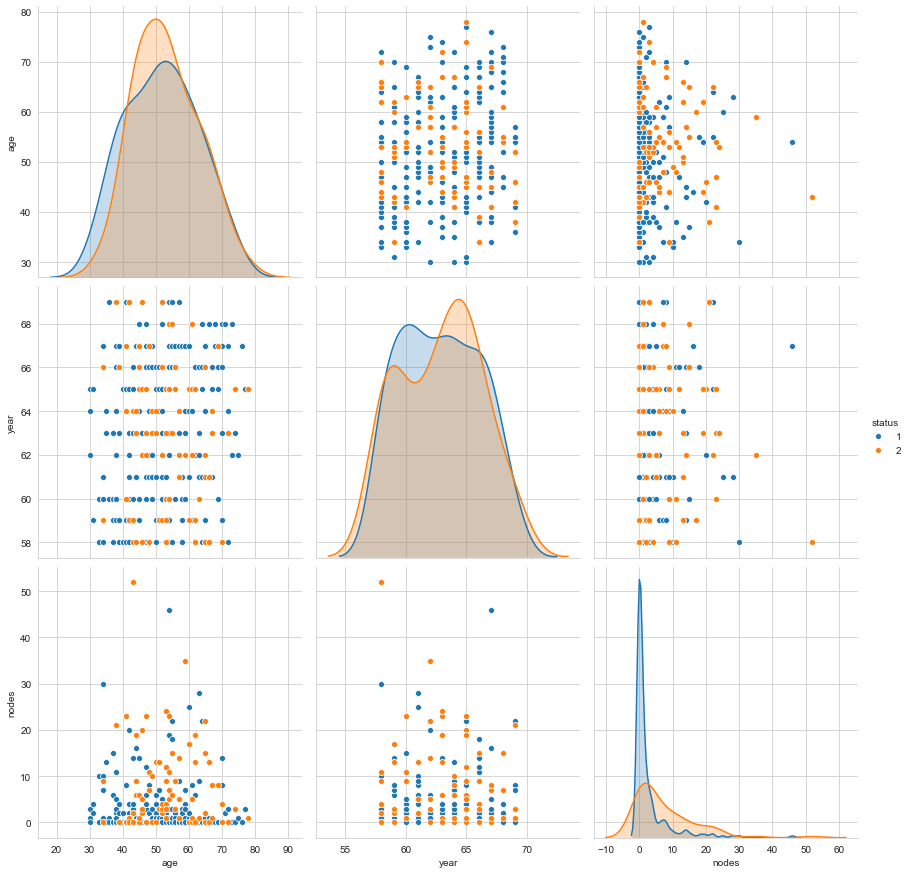

In [12]:
sns.set_style("whitegrid")
sns.pairplot(data, hue="status", size = 4, vars= ['age', 'year', 'nodes'])
plt.show()

Majorly all the plots are overlapping that doesnt shows any insights that can be helpfull for clustering.

The plot of age and nodes is little clean so that can be little compareable.

## Univariate Analysis

C:\Users\h103196\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


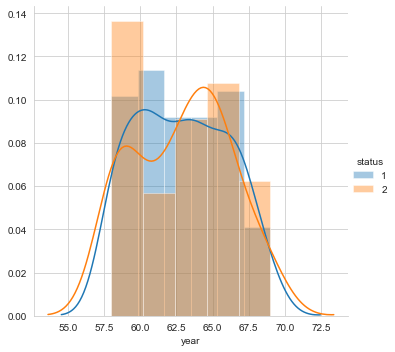

In [13]:
# Distribution Plot Over Year Using dist_plot  (PDF of Year)
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", size =5)\
    .map(sns.distplot, "year")\
    .add_legend()
plt.show()

Both the status PDF is overlapping on eachother, hence clustering is not clear.

C:\Users\h103196\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


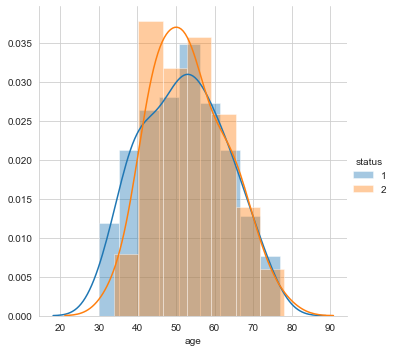

In [14]:
# Distribution Plot Over Age Using dist_plot (PDF of Age)
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", size = 5)\
    .map(sns.distplot, "age")\
    .add_legend()
plt.show()

We can observe alot of overlapping which doesnt speak out specific that it is related to age.

Survival (1) age ranges from 30-76  and Death (2) age ranges from 34-84, while both the status share same range between 33-76. 

C:\Users\h103196\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


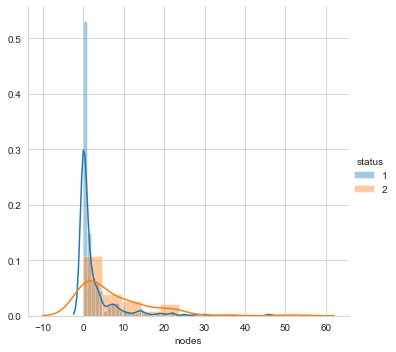

In [15]:
# Distribution Plot Over node Using dist_plot (PDF of Nodes)
sns.set_style("whitegrid")
sns.FacetGrid(data, hue="status", size=5)\
    .map(sns.distplot, "nodes")\
    .add_legend()
plt.show() 

From the above PDF visualization we can observe that people having less nodes have chances to survive more. so seeing this we can say that 


if nodes is less then or equal to 0, they can survive,

if nodes is between 0 to 4, survival chances are high,

if nodes is above 4, survival is not possible as the above distrubtion has more status 2.

## Histogram

In [16]:
status_1 = data.loc[data["status"] == 1]
status_2 = data.loc[data["status"] == 2]

In [17]:
#print(status_1)
#print(status_2)
print(status_1.shape)
print("---------------------")
print(status_2.shape)

(225, 4)
---------------------
(80, 4)


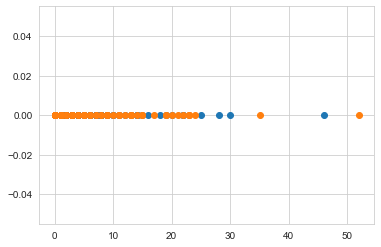

In [18]:
plt.plot(status_1["nodes"], np.zeros_like(status_1["nodes"]), "o")
plt.plot(status_2["nodes"], np.zeros_like(status_2["nodes"]), "o")
plt.show()

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


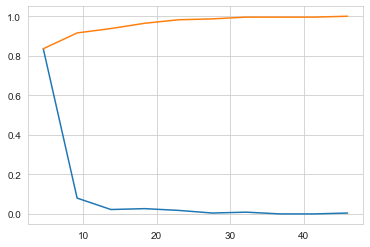

In [19]:
counts, bin_edges = np.histogram(status_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label = "yes")





[0.5625 0.15   0.1375 0.05   0.075  0.     0.0125 0.     0.     0.0125]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


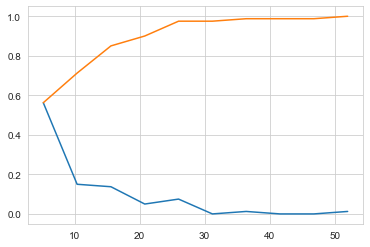

In [20]:
counts, bin_edges = np.histogram(status_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf, label = "NO")

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]
[0.56790123 0.14814815 0.13580247 0.04938272 0.07407407 0.
 0.01234568 0.         0.         0.01234568]
[ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]


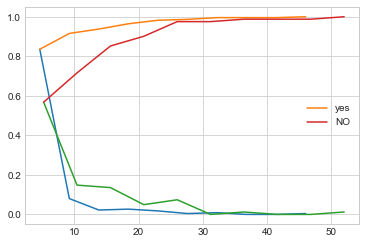

In [105]:
counts, bin_edges = np.histogram(status_1['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf,label = "yes")





counts, bin_edges = np.histogram(status_2['nodes'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf, label = "NO")

plt.legend()


The CDF with the above plot states that one thos ewho have survived are nodes in the range of 0–4, and those are approx near 83%.

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.0375 0.075  0.2125 0.1125 0.2    0.1    0.0875 0.1125 0.0375 0.025 ]
[34.  38.4 42.8 47.2 51.6 56.  60.4 64.8 69.2 73.6 78. ]


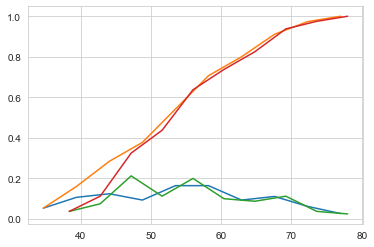

In [21]:
## Sample Plots for Practice
##  Age
counts, bin_edges = np.histogram(status_1['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)







counts, bin_edges = np.histogram(status_2['age'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]
[0.25925926 0.04938272 0.03703704 0.08641975 0.09876543 0.09876543
 0.16049383 0.07407407 0.04938272 0.08641975]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


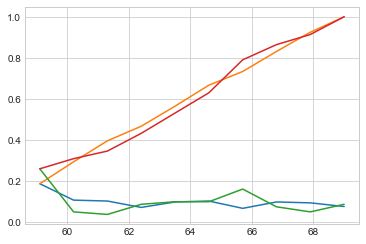

In [107]:
## Sample Plots for Practice
##  year
counts, bin_edges = np.histogram(status_1['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)







counts, bin_edges = np.histogram(status_2['year'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


## Box Plot & Violin Plot

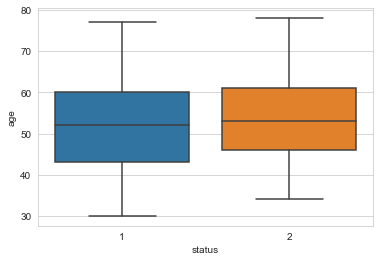

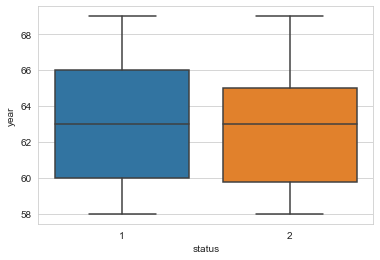

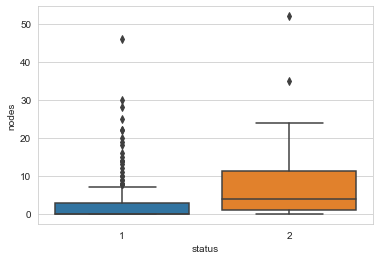

In [22]:
sns.boxplot(x='status',y='age',data=data)
plt.show()
sns.boxplot(x='status',y='year',data=data)
plt.show()
sns.boxplot(x='status',y='nodes',data=data)
plt.show()

The one with 0 nodes have large survived.



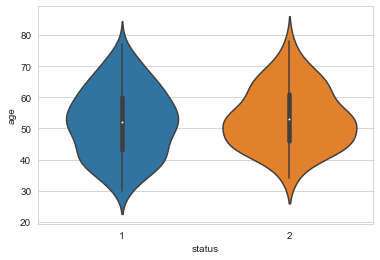

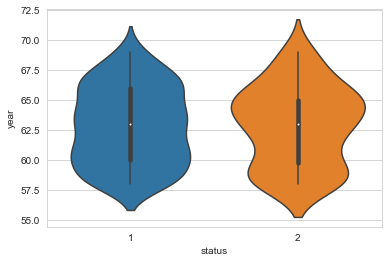

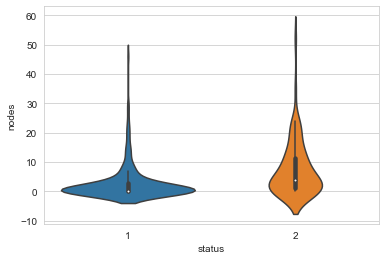

In [23]:
sns.violinplot(x='status',y='age',data = data,height = 5)
plt.show()
sns.violinplot(x='status',y='year',data = data,height = 5)
plt.show()
sns.violinplot(x='status',y='nodes',data = data,height = 5)
plt.show()

The people who survived in the year 65 i.e(1965) got more diagnosed and they did not survive.

Overlap of data points between status (1 & 2) in data column of year and age mentioned via violin plot. 

Age range between 45 to 57 got more diagnosed and they did not survive.


## Mean, Standard Deviation

In [24]:
print("\n Mean:")
print(np.mean(status_1["nodes"]))
print(np.mean(status_2["nodes"]))

print("************************************")

print("\n Standard Deviation:")
print(np.std(status_1["nodes"]))
print(np.std(status_2["nodes"]))


 Mean:
2.7911111111111113
7.525
************************************

 Standard Deviation:
5.857258449412131
9.165117293302908


In [25]:
print('Medians:')
print(np.median(status_1['nodes']))
#print(np.median(np.append(status_1['nodes'],50))) outlier
print(np.median(status_2['nodes']))
#print(np.median(np.append(status_2['nodes'],50)))  Outlier


print("************************************************************************")

print('\nQuantiles:')
print(np.percentile(status_1['nodes'],np.arange(0,100,25)))
print(np.percentile(status_2['nodes'],np.arange(0,100,25)))


print("************************************************************************")

print('\n90th percentile:')
print(np.percentile(status_1['nodes'],90))
print(np.percentile(status_2['nodes'],90))

print("************************************************************************")

from statsmodels import robust
print ('\nMedian Absolute Deviation')
print(robust.mad(status_1['nodes']))
print(robust.mad(status_2['nodes']))

Medians:
0.0
4.0
************************************************************************

Quantiles:
[0. 0. 0. 3.]
[ 0.    1.    4.   11.25]
************************************************************************

90th percentile:
8.0
20.10000000000001
************************************************************************

Median Absolute Deviation
0.0
5.930408874022408


## Conculsion

Considering the overlapping of the features majorly we can say that the data seems to be imbalanced. we would need more features in order to go ahead to preform modelling approach.

## Now Let us have look how do we deal with missing value and categorical value

For this we will take a sample data to understand things in a very clear way


In [60]:
# Importing the dataset
dataset_data = pd.read_csv('Data.csv')
X = dataset_data.iloc[:, :-1].values
y = dataset_data.iloc[:, 3].values

In [61]:
dataset_data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [62]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [63]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [64]:
#dataset_data.isna()
dataset_data.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [65]:
# Taking care of missing data

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [66]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [48]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


LabelEncoder can be used to normalize labels.

In [69]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
le.fit([1, 2, 2, 6])



LabelEncoder()

In [70]:
LabelEncoder()
le.classes_



array([1, 2, 6])

In [71]:

le.transform([1, 1, 2, 6])




array([0, 0, 1, 2], dtype=int64)

In [72]:
le.inverse_transform([0, 0, 1, 2])

array([1, 1, 2, 6])

It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels.

In [73]:
le = preprocessing.LabelEncoder()
le.fit(["paris", "paris", "tokyo", "amsterdam"])
LabelEncoder()


LabelEncoder()

In [74]:
list(le.classes_)



['amsterdam', 'paris', 'tokyo']

In [75]:
le.transform(["tokyo", "tokyo", "paris"])


array([2, 2, 1], dtype=int64)

In [76]:

list(le.inverse_transform([2, 2, 1]))

['tokyo', 'tokyo', 'paris']